# Association

Modelling the explicit labelling of observations from different population components and comparison with standard mixture modelling and clustering techniques.

Model definition and simulation is done in `pyStan` with code in the `stan/` directory.

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import pystan

## A simple mixture model

Consider observations drawn from a mixture of 2 gaussian distributions with different means and the same standard deviation. Each population has an associated weight, $w$, the set of which forms a 2-simplex. The model can be parameterised with a latent categorical variable or *label*, $\lambda$:

<div><center>
    $\lambda \sim Categorical(w)$   
    <center></div>

The observation $y_n$ is distributed according to which mixture componenet it is generated from.

<div><center>
    $y_n \sim Normal(\mu_n, \sigma^2)$   
    <center></div>
    
In order to treat this model in Stan, we marginalise over the discrete parameter:

<div><center>
    $p(y \ | \ w, \mu, \sigma) = \sum_{k = 1}^2 Normal( y \ | \ \mu_k, \sigma^2) $  
    <center></div>
    
  

In [ ]:
# compile the simulation 
simu_file = 'stan/simple_mixture_sim.stan'
model = pystan.StanModel(file = simu_file)

/Users/fran/projects/bayes/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


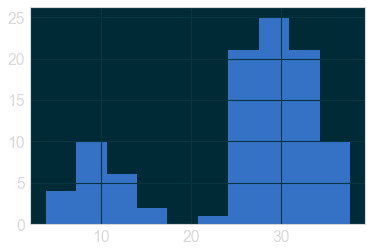

In [26]:
# Use stan to simulate draws from this mixutre model
simu_parameters = {'mu' : [10, 30],
                   'sigma' : 3, 
                   'w' : [0.3, 0.7], 
                   'N_obs' : 100}

fit = model.sampling(data = simu_parameters, algorithm = "Fixed_param", 
                     iter = 1, chains = 1, seed = 19920715)

# plot the simulation
y_simu = fit.extract(['y'])['y'][0]
plt.hist(y_simu);

# dump the data to a file

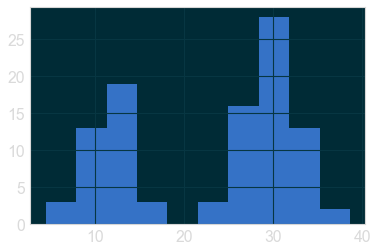